In [22]:
import sys
sys.path.append('../..') 
from typing import Any
import numpy as np
from DL import plot_graph
from Deep_gpu import MyModel
from Deep_gpu.activation import ReLU
from Deep_gpu.activation.loss import MeanSquaredError, CrossEntropyLoss
from Deep_gpu.optimizer.gdo import GradientDescentOptimizer

import matplotlib.pyplot as plt

In [23]:
# 多元多次函数拟合
loss_fn = MeanSquaredError()
layer_dict = {
    'first': {
        'type': 'linear',
        'in_features': 1,
        'out_features': 10,
        'activation': 'ReLU'
    },
    'output': {
        'type': 'linear',
        'in_features': 10,
        'out_features': 1,
        'loss_fn': loss_fn
    }
}

op = GradientDescentOptimizer(lr=0.003, max_iterations=10000)
model = MyModel(layers_dict=layer_dict, optimizer = op)

In [24]:
x = np.random.uniform(low=-10, high=10, size=(1, 100))
y = np.power(x, 2)

In [25]:
model.fit(x.T, y.T)
model.loss[-1]

0.9609840707577478

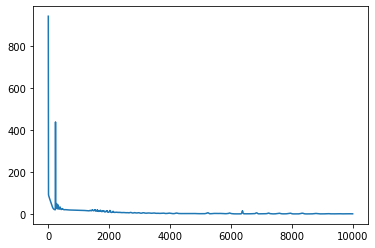

In [26]:
model.loss = np.array([model.loss])
plot_graph(model.loss, graph_show=True)

In [27]:
test_x = np.array([
    [1,2,3,4,5,7,8,9,10,11]
])
y2 = test_x**2
y_pre = model.predict(test_x.T)
y2, y_pre

(array([[  1,   4,   9,  16,  25,  49,  64,  81, 100, 121]], dtype=int32),
 array([[  1.26279045,   4.26324509,   7.92122303,  15.45876238,
          25.11518553,  47.58760361,  63.00770621,  78.42780881,
          93.84791141, 109.26801401]]))

In [28]:
loss, a = loss_fn(y2, y_pre)
loss

9.334584482488918